In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bribe_report.csv')
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [3]:
df.shape

(3473, 6)

In [4]:
df.drop(['Title'],axis =1,inplace =True)

In [5]:
df.head()

,Date,Location,Department,Views,Amount(INR)
0,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [6]:
df.isnull().sum()

Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64

In [7]:
df['Department'] = df['Department'].fillna("Unknown")

In [8]:
df.isnull().sum()

Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [9]:
df['Department'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3473 entries, 0 to 3472
Series name: Department
Non-Null Count  Dtype 
--------------  ----- 
3473 non-null   object
dtypes: object(1)
memory usage: 27.3+ KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3473 non-null   object
 1   Location     3473 non-null   object
 2   Department   3473 non-null   object
 3   Views        3473 non-null   int64 
 4   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 135.8+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3473 non-null   datetime64[ns]
 1   Location     3473 non-null   object        
 2   Department   3473 non-null   object        
 3   Views        3473 non-null   int64         
 4   Amount(INR)  3473 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 135.8+ KB


In [13]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['days_of_month'] = df['Date'].dt.day
df['week_days']   = df['Date'].dt.dayofweek
df['day_names'] = df['Date'].dt.day_name()
df['month_names'] = df['Date'].dt.month_name()


In [14]:
df.head()

,Date,Location,Department,Views,Amount(INR),year,month,days_of_month,week_days,day_names,month_names
0,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,2020,10,14,2,Wednesday,October
1,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,2020,10,13,1,Tuesday,October
2,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,2020,10,13,1,Tuesday,October
3,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,2020,10,13,1,Tuesday,October
4,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000,2020,10,13,1,Tuesday,October


In [15]:
df['City'] = df['Location'].str.split(',').apply(lambda x: x[0])
df['State'] = df['Location'].str.split(',').apply(lambda x: x[-1])

In [16]:
df.head()

,Date,Location,Department,Views,Amount(INR),year,month,days_of_month,week_days,day_names,month_names,City,State
0,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,2020,10,14,2,Wednesday,October,Bangalore,Karnataka
1,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,2020,10,13,1,Tuesday,October,Bangalore,Karnataka
2,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,2020,10,13,1,Tuesday,October,Bangalore,Karnataka
3,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,2020,10,13,1,Tuesday,October,Bangalore,Karnataka
4,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000,2020,10,13,1,Tuesday,October,Siwan,Bihar


In [17]:
df.drop('Location',axis =1,inplace =True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3473 non-null   datetime64[ns]
 1   Department     3473 non-null   object        
 2   Views          3473 non-null   int64         
 3   Amount(INR)    3473 non-null   int64         
 4   year           3473 non-null   int64         
 5   month          3473 non-null   int64         
 6   days_of_month  3473 non-null   int64         
 7   week_days      3473 non-null   int64         
 8   day_names      3473 non-null   object        
 9   month_names    3473 non-null   object        
 10  City           3473 non-null   object        
 11  State          3473 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 325.7+ KB


# 1 - Most Bribes are paid in which cities?


In [19]:
df1= df[['City', 'Amount(INR)']].copy()
df1.head(10)

,City,Amount(INR)
0,Bangalore,400
1,Bangalore,350
2,Bangalore,100
3,Bangalore,100
4,Siwan,15000
5,Siwan,15000
6,Coimbatore,5000
7,Bangalore,500
8,Hyderabad,2500
9,Mysore,4000


In [20]:
most_bribe_area=df.groupby(['City'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
most_bribe_area

,count,sum
City,,
Bangalore,769,18922321
NewDelhi,230,7198320
Chennai,163,5030228
Mumbai,122,8745496
Pune,119,849812
Hyderabad,94,2475545
Adari,62,296136
Abohar,51,3370030
Abhayapuri,51,304595


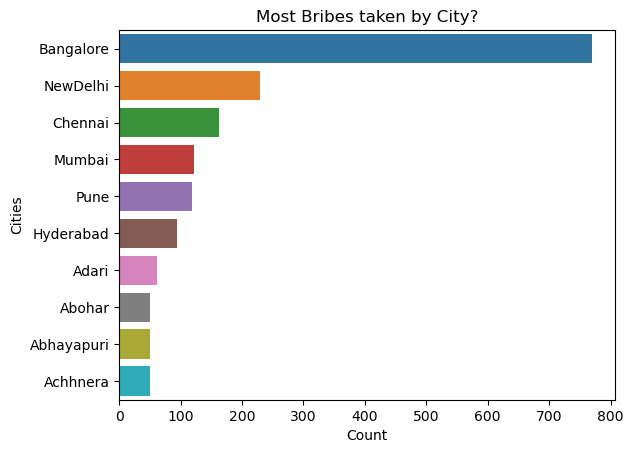

In [21]:
sn.barplot(y=most_bribe_area.index,x=most_bribe_area['count'])
plt.xlabel('Count')
plt.ylabel("Cities")
plt.title('Most Bribes taken by City?');

In [22]:
most_bribe_area.reset_index(inplace=True)
most_bribe_area.head()

,City,count,sum
0,Bangalore,769,18922321
1,NewDelhi,230,7198320
2,Chennai,163,5030228
3,Mumbai,122,8745496
4,Pune,119,849812


In [23]:
most_bribe_area[['City', 'count','sum']][most_bribe_area['sum'] == most_bribe_area['sum'].max()]   # Bangalore has highest number of bribes paid

,City,count,sum
0,Bangalore,769,18922321


# 2- Most Bribes are paid in which states?

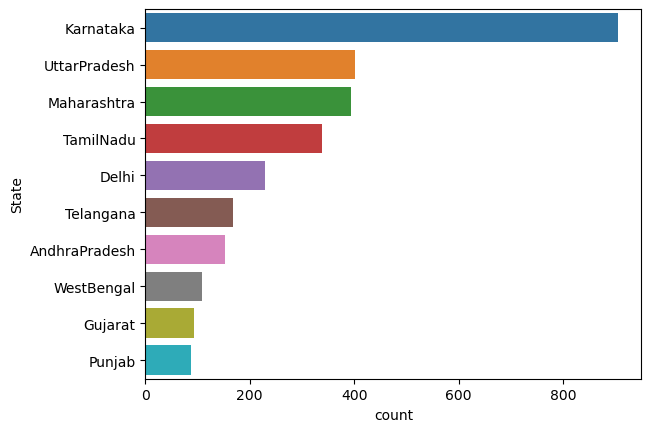

In [26]:
most_bribe_State=df.groupby(['State'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sn.barplot(y=most_bribe_State.index,x=most_bribe_State['count']);

In [27]:
most_bribe_State.reset_index(inplace=True)
most_bribe_State.head()

,State,count,sum
0,Karnataka,905,25006233
1,UttarPradesh,401,11722391
2,Maharashtra,393,14343076
3,TamilNadu,339,9078678
4,Delhi,230,7198320


In [28]:
most_bribe_State[['State', 'count','sum']][most_bribe_State['sum'] == most_bribe_State['sum'].max()]  #Karnatak state has highest numbers of bribe paid

,State,count,sum
0,Karnataka,905,25006233


# 3- Which department gets paid the most bribe?

In [29]:
depart_freq=df.groupby('Department')['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)

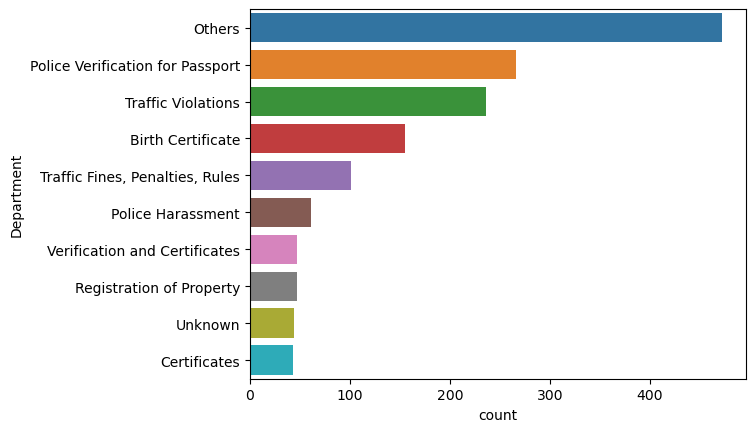

In [30]:
sn.barplot(y=depart_freq.index,x=depart_freq['count']);

In [31]:
depart_freq.reset_index(inplace=True)
depart_freq.head()

,Department,count,sum
0,Others,472,8499390
1,Police Verification for Passport,266,860703
2,Traffic Violations,236,189459
3,Birth Certificate,155,1565904
4,"Traffic Fines, Penalties, Rules",101,141369


In [32]:
depart_freq[['Department', 'count','sum']][depart_freq['sum'] == depart_freq['sum'].max()]  # An other department has highest numbers of bribe paid

,Department,count,sum
0,Others,472,8499390


# 4-Departments which take most bribe on average and overall.

In [33]:
df.head()

,Date,Department,Views,Amount(INR),year,month,days_of_month,week_days,day_names,month_names,City,State
0,2020-10-14,"Births, Family and Care",1225,400,2020,10,14,2,Wednesday,October,Bangalore,Karnataka
1,2020-10-13,Vehicle Insurance,1158,350,2020,10,13,1,Tuesday,October,Bangalore,Karnataka
2,2020-10-13,Driving and Transport Business,1249,100,2020,10,13,1,Tuesday,October,Bangalore,Karnataka
3,2020-10-13,Driving Licenses and Tests,1044,100,2020,10,13,1,Tuesday,October,Bangalore,Karnataka
4,2020-10-13,FIR and Complaints,1068,15000,2020,10,13,1,Tuesday,October,Siwan,Bihar


In [34]:
df7=df.groupby('Department')['Amount(INR)'].agg(['mean','sum']).sort_values(by='sum',ascending=False).head(10)
df7                                                         # PWD office has most Bribe on average.
                                                            # Other Department has overall high numbers in Bribe.   

,mean,sum
Department,,
Others,18007.182203,8499390
Sales Tax,274073.684211,5207400
Encumbrance Certificate,267220.937500,4275535
Admission to College,350145.555556,3151310
Customs Check and Clearance,79669.538462,3107112
PWD Officers,512350.000000,3074100
Police Harassment,47074.590164,2871550
FIR and Complaints,70357.500000,2814300
Building Plan Approval,209923.076923,2729000


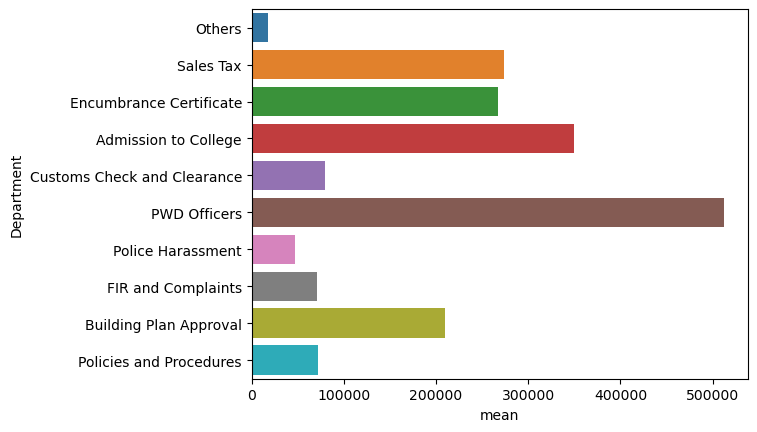

In [35]:
sn.barplot(y=df7.index,x=df7['mean']);

# 5-Bribes paid by days of the month

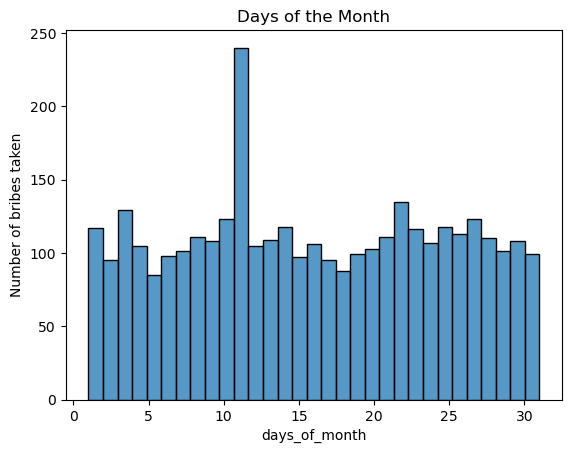

In [62]:
sn.histplot(data=df["days_of_month"],bins=31)
plt.ylabel("Number of bribes taken")                        # On 11th of every month most bribe has happened 
plt.title("Days of the Month");

# 6-Bribes paid by days of the days of week


In [47]:
df5 =df[['day_names', 'Amount(INR)']].copy()
df5.head()

,day_names,Amount(INR)
0,Wednesday,400
1,Tuesday,350
2,Tuesday,100
3,Tuesday,100
4,Tuesday,15000


In [48]:
df5=df5.groupby(["day_names"]).sum()
df5.head()

,Amount(INR)
day_names,
Friday,19791044
Monday,15881550
Saturday,16243943
Sunday,14221997
Thursday,16120406


In [49]:
df5.reset_index(inplace=True)
df5

,day_names,Amount(INR)
0,Friday,19791044
1,Monday,15881550
2,Saturday,16243943
3,Sunday,14221997
4,Thursday,16120406
5,Tuesday,13991288
6,Wednesday,19438297


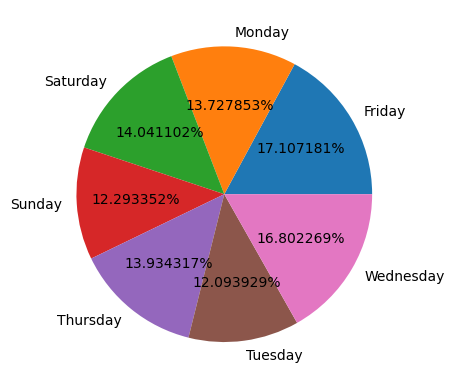

<Figure size 2000x2000 with 0 Axes>

In [53]:
Day= df5['day_names']                               # Here 0=Monday,1 =Tue and so on. 
Amount =df5['Amount(INR)']
                                                     # On Friday maximum bribe happening
plt.pie(Amount, labels =Day,autopct="%2f%%")         # On sunday least bribe happening
plt.figure(figsize=(20,20))
plt.show()

# 7-Bribes paid by Years

In [54]:
df6 =df[['year', 'Amount(INR)']].copy()
df6.head()

,year,Amount(INR)
0,2020,400
1,2020,350
2,2020,100
3,2020,100
4,2020,15000


In [55]:
df6=df6.groupby(["year"]).sum()
df6

,Amount(INR)
year,
2015,3931905
2016,30944585
2017,10649136
2018,18902211
2019,37493268
2020,13767420


In [56]:
df6.reset_index(inplace=True)
df6

,year,Amount(INR)
0,2015,3931905
1,2016,30944585
2,2017,10649136
3,2018,18902211
4,2019,37493268
5,2020,13767420


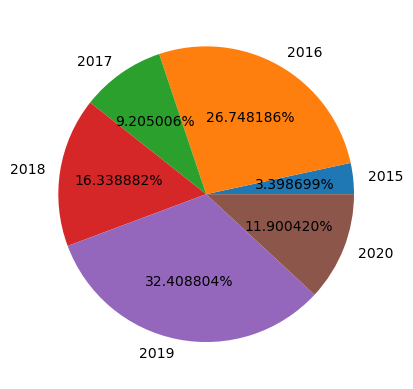

<Figure size 2000x2000 with 0 Axes>

In [57]:
Year= df6['year']                                
Bribe_Amount =df6['Amount(INR)']
                                                     # Maximum times Bribe has happened in 2019
plt.pie(Bribe_Amount, labels =Year,autopct="%2f%%")
plt.figure(figsize=(20,20))
plt.show()

# 8-Conclusion

# 1.  Bangalore has highest number of bribes paid.
# 2.  Karnatak state has highest numbers of bribe paid.
# 3.  other department has highest numbers of bribe paid.
# 4.  PWD office has most Bribe numbers on average.
# 5.  On 11th of every month most bribe has happened.
# 6.  On Friday and wednesday of each week maximum brbibe happening.
# 7.  Bribes are taken less frequently on Sundays.
# 8.  Highest number of bribes taking cases are reported in 2016 and 2019.
# 9.  The amount of bribe taken doesn't affect the number of viewers.